**DBSCAN clustering**

In [94]:
import numpy as np
import pandas as pd
import seaborn as sus
import matplotlib.pyplot as plt

In [95]:
df = pd.read_csv( "./Assets/Mall_Customers.csv" )
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [96]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [98]:
df.drop(['Gender'], axis=1, inplace=True)
df.drop(['Age'], axis=1, inplace=True)
df.head()

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40


In [99]:
df

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40
...,...,...,...
195,196,120,79
196,197,126,28
197,198,126,74
198,199,137,18


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

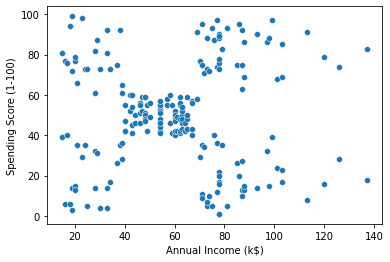

In [100]:
sus.scatterplot( x = df[ "Annual Income (k$)" ] , y = df[ "Spending Score (1-100)" ] )

In [175]:
from sklearn.cluster import DBSCAN


In [176]:
dbsmodel = DBSCAN(eps=7, min_samples=5)

In [177]:
preds = dbsmodel.fit_predict( df )

In [178]:
new_df = df.copy()
new_df["Clusters"] = preds

In [179]:
new_df

,CustomerID,Annual Income (k$),Spending Score (1-100),Clusters
0,1,15,39,-1
1,2,15,81,-1
2,3,16,6,-1
3,4,16,77,-1
4,5,17,40,-1
...,...,...,...,...
195,196,120,79,-1
196,197,126,28,-1
197,198,126,74,-1
198,199,137,18,-1


In [180]:
new_df.head()

,CustomerID,Annual Income (k$),Spending Score (1-100),Clusters
0,1,15,39,-1
1,2,15,81,-1
2,3,16,6,-1
3,4,16,77,-1
4,5,17,40,-1


c:\Users\straw\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Clusters', ylabel='count'>

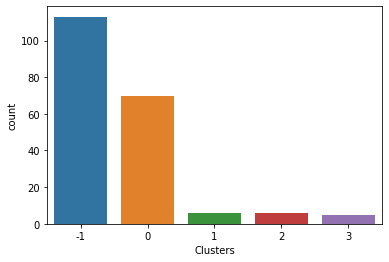

In [181]:
sus.countplot(new_df["Clusters"])

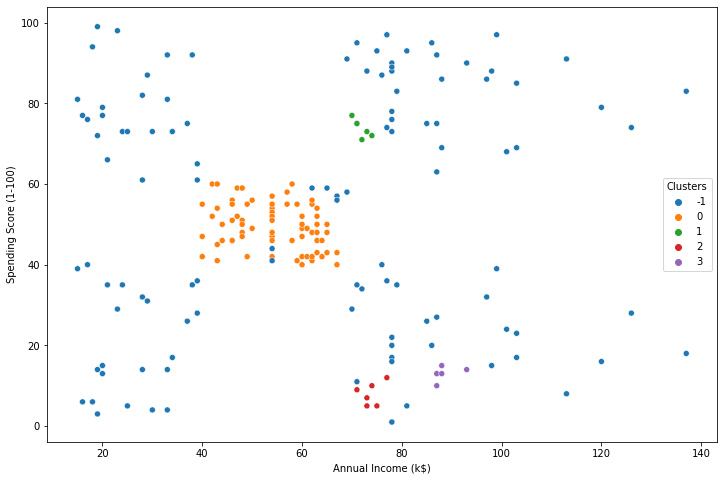

In [183]:
plt.figure(figsize=(12,8))
sus.scatterplot(x=new_df["Annual Income (k$)"], y=new_df["Spending Score (1-100)"], hue=new_df["Clusters"], palette=["C0", "C1", "C2", "C3", "C4"])
plt.show()